In [8]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import rasterio as rio
from rasterio.plot import show
from rasterio.mask import mask
from rasterstats import zonal_stats
import plotly.express as px
import json
import sys, os, pyproj, rasterstats, time, matplotlib, csv
import pandas as pd
from pyproj import CRS
from matplotlib import pyplot
from matplotlib.colors import PowerNorm
from shapely.geometry import Polygon, MultiPolygon
from shapely.ops import nearest_points

C:\Users\Joe\AppData\Local\Temp\ipykernel_15092\684602728.py:2: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


# Lecture 2

In [2]:
counties = gpd.read_file('data/USA_adm_shp/USA_adm2.shp')

<AxesSubplot:>

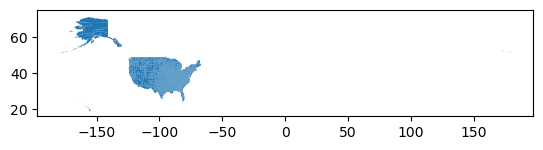

In [3]:
counties.plot()

In [4]:
counties.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,244,USA,United States,1,Alabama,1,Autauga,US.AL.AU,0,None,County,County,None,None,"POLYGON ((-86.91668 32.66431, -86.82678 32.660..."
1,244,USA,United States,1,Alabama,2,Baldwin,US.AL.BD,0,None,County,County,None,None,"MULTIPOLYGON (((-87.51056 30.33972, -87.51083 ..."
2,244,USA,United States,1,Alabama,3,Barbour,US.AL.BR,0,None,County,County,None,None,"POLYGON ((-85.13026 31.76386, -85.13504 31.768..."
3,244,USA,United States,1,Alabama,4,Bibb,US.AL.BI,0,None,County,County,None,None,"POLYGON ((-87.42078 32.87446, -87.42028 32.971..."
4,244,USA,United States,1,Alabama,5,Blount,US.AL.BU,0,None,County,County,None,None,"POLYGON ((-86.95322 33.81542, -86.95449 33.845..."


In [5]:
counties=(counties[(counties.NAME_1 != 'Alaska')&
                   (counties.NAME_1 != 'Hawaii')][
                  ['NAME_1','NAME_2','geometry']].reset_index(drop=True))

<AxesSubplot:>

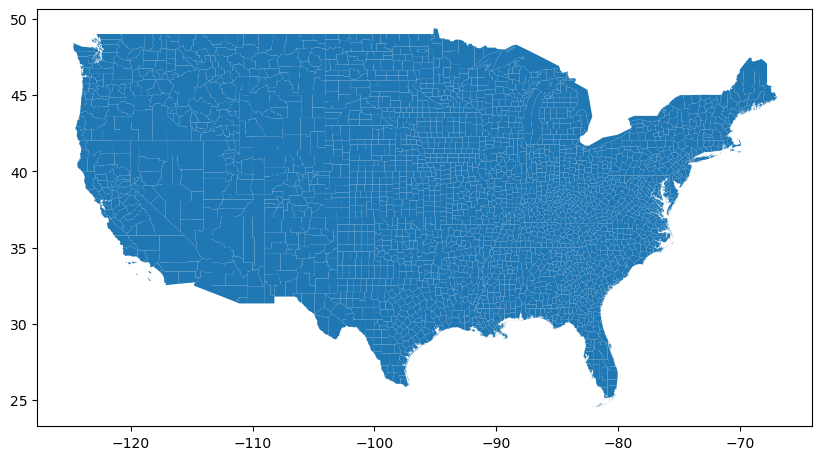

In [6]:
counties.plot(figsize=(10,6))

In [7]:
suit = rio.open('data/agrisuit/agrisuit.tif')

<AxesSubplot:>

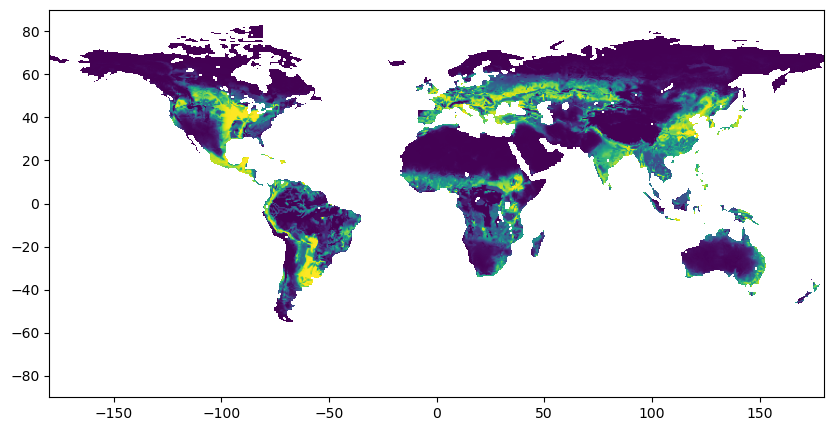

In [8]:
f,ax=plt.subplots(figsize=(10, 6))
show(suit,ax=ax)

In [9]:
suit.crs

CRS.from_epsg(4326)

In [12]:
array = suit.read(1)

In [13]:
array[array < 0] = np.nan

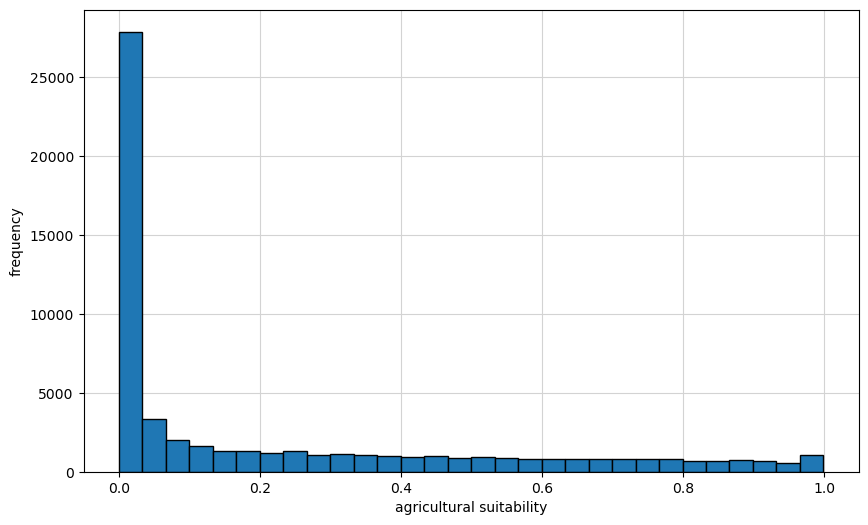

In [14]:
f, ax = plt.subplots(1,1, figsize=(10, 6))
ax.hist(array[array != np.nan].reshape(-1,1), bins=30, edgecolor='k')
ax.set_xlabel('agricultural suitability')
ax.set_ylabel('frequency')
ax.grid(color='lightgray')
ax.set_axisbelow(True)
plt.show()

In [15]:
suit_us_array, suit_us_transform = mask(suit, shapes=counties.geometry, crop=True, nodata=np.nan)

<AxesSubplot:>

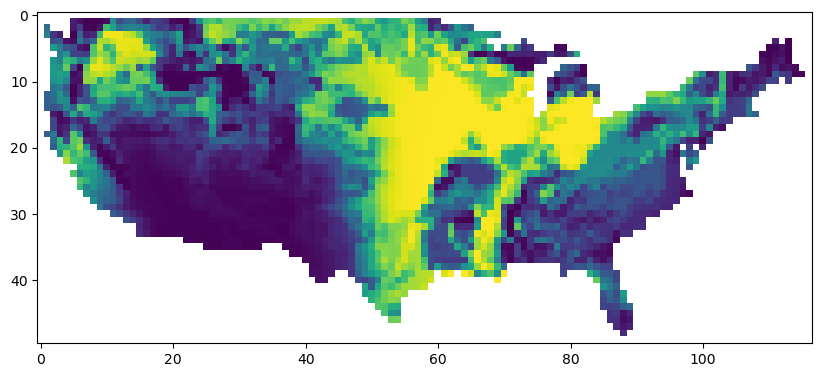

In [16]:
f, ax = plt.subplots(figsize=(10, 6))
show(suit_us_array, ax=ax)

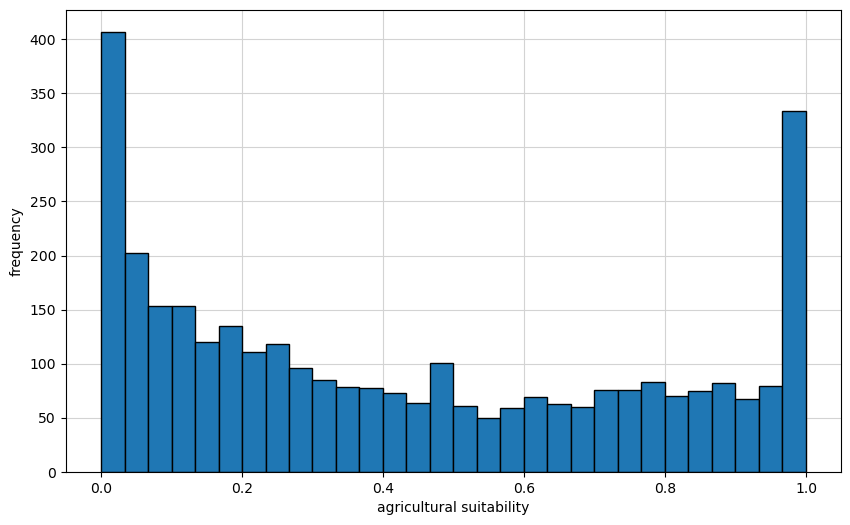

In [17]:
f, ax = plt.subplots(1,1, figsize=(10, 6))
ax.hist(suit_us_array[suit_us_array != np.nan].reshape(-1,1), bins=30, edgecolor='k')
ax.set_xlabel('agricultural suitability')
ax.set_ylabel('frequency')
ax.grid(color='lightgray')
ax.set_axisbelow(True)
plt.show()

In [18]:
zs1 = zonal_stats(counties, suit_us_array[0], affine=suit_us_transform, stats=['mean'], nodata=np.nan)    
zs2 = zonal_stats(counties, suit_us_array[0], affine=suit_us_transform, stats=['mean'], nodata=np.nan, all_touched=True)    
counties['mean_suit1'] = [x['mean'] for x in zs1]
counties['mean_suit2'] = [x['mean'] for x in zs2]

<AxesSubplot:>

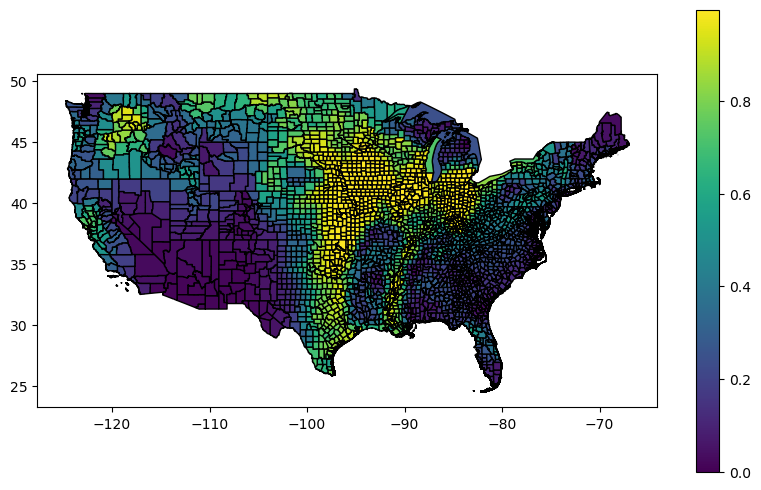

In [19]:
counties.plot(column='mean_suit2', cmap='viridis', edgecolor='k', legend=True, figsize=(10, 6))

# Lecture 3

In [2]:
import sys, os, pyproj, rasterstats, time, matplotlib, csv
import pandas as pd
import geopandas as gpd
import rasterio as rio
import numpy as np
from pyproj import CRS
from matplotlib import pyplot
from matplotlib.colors import PowerNorm
import matplotlib.pyplot as plt
from rasterio.plot import show
from shapely.geometry import Polygon, MultiPolygon
from shapely.ops import nearest_points
import pathlib

C:\Users\Joe\AppData\Local\Temp\ipykernel_21372\1313944781.py:3: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


Using pathlib to resolve filepaths

In [1]:
import pathlib
mainpath = pathlib.Path()
mainpath

WindowsPath('.')

In [2]:
mainpath = mainpath.resolve()

In [3]:
inpath=mainpath/'data3'
outpath=mainpath/'outpath'
junkpath = mainpath/'junkpath'

input files

In [30]:
cntrs_in = inpath/'ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp'
coast_in = inpath/'ne_10m_coastline/ne_10m_coastline.shp'
water_in = inpath/'ne_10m_lakes/ne_10m_lakes.shp'
wlds_in = inpath/'langa.shp'
suit_in = inpath/'agrisuit/agrisuit_nocrs.tif'
popd_in  = inpath/"HYDE/{y}ad_pop/popd_{y}AD.asc"
# elev_in = "{}/elevation/srtmv4_30s/hdr.adf".format(inpath) 
# temp_in =  "{path}/worldclim/temperature/tmean_30s_bil/tmean_{month}.bil"
# prec_in =  "{path}/worldclim/precipitation/prec_30s_bil/prec_{month}.bil"

temporary files

In [5]:
wlds_cln = junkpath/"wlds_cleaned.shp"
suit_cln = junkpath/"landquality.tif"
popd_cln = junkpath/"popd_{y}AD.tif"
# elev_cln = junkpath/"elevation.tif"
# temp_cln = junkpath/"temp_mean.tif"
# prec_cln = junkpath/"prec_mean.tif"
vc_shp   = junkpath/"vcountries.shp"
vc_wlangs_shp = junkpath/"vc_withlangs.shp"
vc_wolangs_shp = junkpath/"vc_withoutlangs.shp"
dyad_shp = junkpath/"dyadcells.shp"

output files

In [6]:
cntry_zs_csv = outpath/"country_level_zs.csv"
cntry_nlangs_csv = outpath/"nlangs_country.csv"
cntry2coast_csv = outpath/"centroids_closest_coast.csv"
cntry_areas_csv = outpath/"country_areas.csv"
vc_nlangs_csv = outpath/"nlangs_vcountries.csv"
vc_areas_csv = outpath/"vcareas.csv"
vc_waterarea_csv = outpath/"vcwaterareas.csv"
vc2coast_csv = outpath/"vccentroids_closest_coast.csv"
vc_zs_csv = outpath/"vc_level_zs.csv"
vc_wolangs_zs_csv = outpath/"vcnl_level_zs.csv"
dyad_langs_csv = outpath/"langs_in_dyadcells.csv"   
dyad_areas_csv = outpath/"dyadareas.csv"
dyad_waterarea_csv = outpath/"dyadwaterareas.csv"
dyad2coast_csv = outpath/"dyadcentroids_closest_coast.csv"
dyad_evtp_csv = outpath/"dyads_evtp.csv"
dyad_nghbs_csv = outpath/"dyadpolyneighbors.csv"

In [9]:
wgs84_crs = CRS.from_string('EPSG:4326') # WGS 1984
wcea_crs = CRS.from_string('esri:54034') # World cylindical equal area projection

## Clean data

### Clean language data

In [10]:
wlds_gdf=gpd.read_file(wlds_in)

In [11]:
wlds_gdf.columns #look at columns/variables in the data

Index(['ID', 'ID_ISO_A3', 'ID_ISO_A2', 'ID_FIPS', 'NAM_LABEL', 'NAME_PROP',
       'NAME2', 'NAM_ANSI', 'CNT', 'C1', 'POP', 'LMP_POP1', 'G', 'LMP_CLASS',
       'FAMILYPROP', 'FAMILY', 'langpc_km2', 'geometry'],
      dtype='object')

In [12]:
wlds_gdf.crs #coorindate system

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

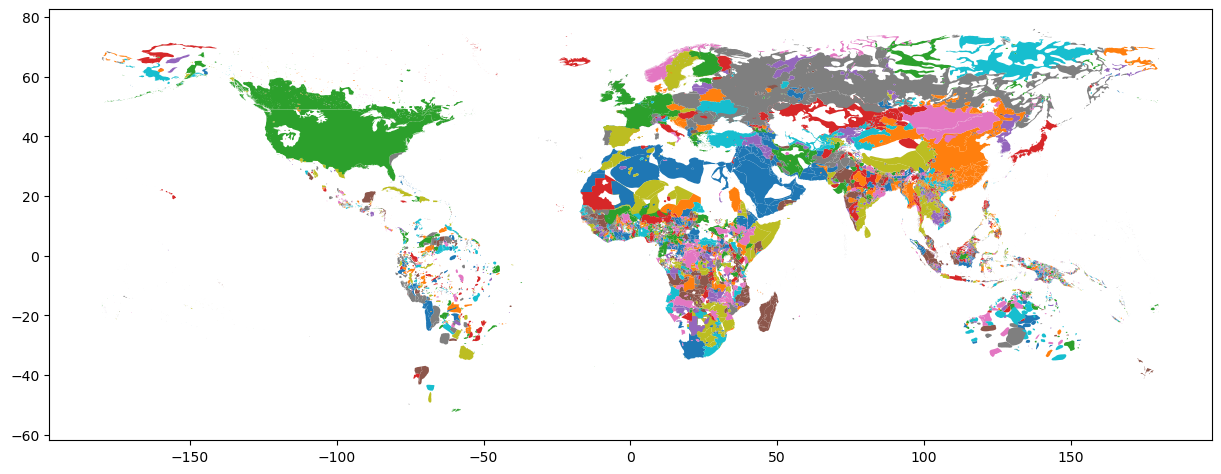

In [13]:
wlds_gdf.plot(column='NAME_PROP', figsize=(15, 10)) #plot all the languages

Visualise using leafmap

In [24]:
import leafmap

m = leafmap.Map()
m.add_gdf(wlds_gdf, layer_name="World Languages")

In [ ]:
m

Add unique feature ID

In [14]:
wlds_gdf['GID'] = range(1, len(wlds_gdf) + 1)

rename columns

In [15]:
wlds_gdf=wlds_gdf.rename(columns={'NAME_PROP': 'lnm'})

In [16]:
wlds_gdf[['GID','lnm']] #compare GID with renamed column

,GID,lnm
0,1,Papiamentu
1,2,Grangali
2,3,Pahlavani
3,4,Brahui
4,5,"Pashto, Southern"
...,...,...
7607,7608,French
7608,7609,French
7609,7610,Mandinka
7610,7611,Spanish


In [17]:
wlds_gdf=wlds_gdf[['geometry','GID','ID','lnm']]

In [18]:
wlds_gdf.columns #look at remaining columns/variables in the data

Index(['geometry', 'GID', 'ID', 'lnm'], dtype='object')

In [19]:
wlds_gdf.to_file(wlds_cln)

In [20]:
suit_rst= rio.open(suit_in)

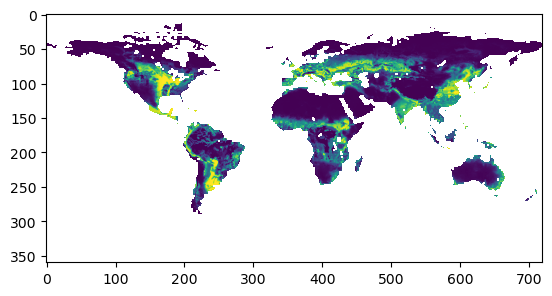

In [21]:
pyplot.imshow(suit_rst.read(1, masked=True), cmap='viridis') #plot suitability raster

In [22]:
suit_rst.profile #display metadata for raster

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 720, 'height': 360, 'count': 1, 'crs': None, 'transform': Affine(0.5, 0.0, -180.0,
       0.0, -0.5, 90.0), 'blockysize': 2, 'tiled': False, 'interleave': 'band'}

In [23]:
print(suit_rst.crs) #display input coordinate system (None)


None


In [24]:
profile=suit_rst.profile #get profile of original raster

In [25]:
profile.update(crs=wgs84_crs) #update profile with CRS 

In [26]:
profile

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 720, 'height': 360, 'count': 1, 'crs': <Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
, 'transform': Affine(0.5, 0.0, -180.0,
       0.0, -0.5, 90.0), 'blockysize': 2, 'tiled': False, 'interleave': 'band'}

In [27]:
suit_arr=suit_rst.read() #read the original raster as an array

In [28]:
with rio.open(suit_cln, 'w', **profile) as dst:
    dst.write(suit_arr) #write the array to tiff, using updated profile

In [31]:
#convert ASCII rasters to GeoTiff
for year in ['1500','1990','2000']:
    rast_o=rio.open(popd_in.format(path=inpath,y=year))
    prf=rast_o.profile.copy()
    prf.update(driver='GTiff',crs=wgs84_crs) #switch from ASCII to GEOTiff and set CRS
    img_a=rast_o.read()
    with rio.open(popd_cln.format(path=junkpath,y=year), 'w', **prf) as dst:
        dst.write(img_a)

AttributeError: 'WindowsPath' object has no attribute 'format'